In [17]:
import cv2 as cv 
import numpy as np
import matplotlib.pyplot as plt
import math 
def filtering(img , filter_type , _filter , D0 ):
    rows , cols = img.shape
    # making pad zero 
    pad_img = cv.copyMakeBorder(img , 0 , rows , 0 , cols , cv.BORDER_CONSTANT )
    # calculate fft transform
    dft = cv.dft(np.float32(pad_img), flags=cv.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)
    
    
    if filter_type == 'ideal':
        for u in range(dft_shift.shape[0]):
            for v in range(dft_shift.shape[1]):
                D = math.sqrt(((u - rows) ** 2) + ((v - cols) ** 2))
                if _filter == 'lowpass':
                    if D>D0 :
                        dft_shift[u, v] = 0
                if _filter == 'highpass':
                    if D<=D0 :
                        dft_shift[u, v] = 0
                    
    if filter_type == 'Butterworth':
        for u in range(dft_shift.shape[0]):
            for v in range(dft_shift.shape[1]):
                D = math.sqrt(((u - rows) ** 2) + ((v - cols) ** 2))
                n=2
                if _filter == 'lowpass':
                    dft_shift[u, v] = dft_shift[u, v] / (1 + ((D / D0) ** (2 * n)))

                if _filter == 'highpass':
                    dft_shift[u, v] = dft_shift[u, v] * ((D ** (2 * n)) / ((D0 ** (2 * n)) + (D ** (2 * n))))
    
        
    
    if filter_type == 'Gaussian':
        for u in range(dft_shift.shape[0]):
            for v in range(dft_shift.shape[1]):
                D = np.sqrt(((u - rows) ** 2) + ((v - cols) ** 2))
                
                if _filter == 'lowpass':
                    dft_shift[u, v] = dft_shift[u, v] * (np.exp(-(D ** 2) / (2 * D0 ** 2)))

                if _filter == 'highpass':
                    dft_shift[u, v] = dft_shift[u, v] * (1 - np.exp(-(D ** 2) / (2 * D0 ** 2)))
        
                
    # inverse fft to get new image after filtering        
    dft_ishift = np.fft.ifftshift(dft_shift)
    img_back = cv.idft(dft_ishift)
    img_back = cv.magnitude(img_back[:, :, 0], img_back[:, :, 1])
    img_back = cv.normalize(img_back, None, alpha=0, beta=255, norm_type=cv.NORM_MINMAX, dtype=cv.CV_8U)
    
    # cropping pad image
    img_back = img_back[0 : rows , 0 : cols]
    return img_back

                    

img = cv.imread('a.tif' , 0)
#cv.imshow('ILP' , filtering(img , 'ideal' , 'lowpass' , 200 ))
#cv.imshow('IHP' , filtering(img , 'ideal' , 'highpass' , 200 ))
#cv.imshow('BLP' , filtering(img , 'Butterworth' , 'lowpass' ,200 ))
#cv.imshow('BHP' , filtering(img , 'Butterworth' , 'highpass' , 200 ))
cv.imshow('GLP' , filtering(img , 'Gaussian' , 'lowpass' ,200 ))
cv.imshow('GHP' , filtering(img , 'Gaussian' , 'highpass' ,200 ))



cv.waitKey(0)
cv.destroyAllWindows()

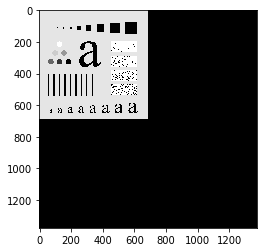

In [2]:
import cv2 as cv 
import numpy as np
import matplotlib.pyplot as plt
import math 
img = cv.imread('a.tif' , 0)
rows , cols = img.shape
pad_img = cv.copyMakeBorder(img , 0 , rows , 0 , cols , cv.BORDER_CONSTANT )
plt.imshow(pad_img , cmap = 'gray')

plt.show()
cv.waitKey(0)
cv.destroyAllWindows()